In [787]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\ProgramData\Anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


In [788]:
#Necessary libraries
import numpy as np #handling multi-dimensional arrays
import pandas as pd #handling arrays & dataframes

from sklearn.preprocessing import LabelEncoder #to convert categorical attributes to numerical

import seaborn as sns   # visualization
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold #Splitting your dataset is essential for an unbiased evaluation of prediction performance
from sklearn.neighbors import KNeighborsClassifier # classifier
from scipy.stats import zscore # convert to Z scale 
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from imblearn.over_sampling import SMOTE
from collections import Counter


# 1.Import and warehouse data:

In [789]:
#1. Reading the data as a data frame
data_n = pd.read_csv(r'D:\python\GL\3.MachineLearning_Intro2SupervisedLearingProject\Part1 - Normal.csv')
data_h = pd.read_csv(r'D:\python\GL\3.MachineLearning_Intro2SupervisedLearingProject\Part1 - Type_H.csv')
data_s = pd.read_csv(r'D:\python\GL\3.MachineLearning_Intro2SupervisedLearingProject\Part1 - Type_S.csv')                        

# 1.a Import all the given datasets and explore shape and size of each.


In [790]:
data_n.head()#to see data sample 

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [791]:
data_n["Class"].unique()#finding all unique class names

array(['Normal', 'Nrmal'], dtype=object)

# 2a.Explore and if required correct the datatypes of each attribute

In [792]:
data_n["Class"]="Normal"#assigning single name for mutiple class name

# 2b. Explore for null values in the attributes and if required drop or impute values.
# 3a. Perform detailed statistical analysis on the data.

In [793]:
data_n.describe().transpose()#for statistical analysis

count        mean        std         min         25%         50%  \
P_incidence  100.0   51.685244  12.368161   30.741938   42.817849   50.123115   
P_tilt       100.0   12.821414   6.778503   -5.845994    8.799951   13.482435   
L_angle      100.0   43.542605  12.361388   19.071075   35.000000   42.638923   
S_slope      100.0   38.863830   9.624004   17.386972   32.340487   37.059694   
P_radius     100.0  123.890834   9.014246  100.501192  118.182659  123.874328   
S_Degree     100.0    2.186572   6.307483  -11.058179   -1.511360    1.152710   

                    75%         max  
P_incidence   61.470097   89.834676  
P_tilt        16.785953   29.894119  
L_angle       51.602346   90.563461  
S_slope       44.608788   67.195460  
P_radius     129.040401  147.894637  
S_Degree       4.968807   31.172767

In [794]:
data_n.info()#to find non null counts & each columns data types & its size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [795]:
data_n.isna().sum()#to find the NaN occurance counts in each coloumn

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [796]:
data_h.head()#to see data sample 

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

In [797]:
data_h["Class"].unique()#finding all unique class names

array(['Type_H', 'type_h'], dtype=object)

# 2a.Explore and if required correct the datatypes of each attribute

In [798]:
data_h["Class"]="Type_H"

In [799]:
data_h.describe().transpose()#for statistical analysis

count        mean        std        min         25%         50%  \
P_incidence   60.0   47.638407  10.697131  26.147921   41.018099   46.416169   
P_tilt        60.0   17.398795   7.016708   3.144669   12.874329   16.949285   
L_angle       60.0   35.463524   9.767795  14.000000   29.038069   35.164873   
S_slope       60.0   30.239612   7.555388  13.366931   25.215275   30.000659   
P_radius      60.0  116.474968   9.355720  84.241415  112.280320  116.696146   
S_Degree      60.0    2.480251   5.531177 -10.675871   -0.910819    2.542441   

                    75%         max  
P_incidence   53.922329   74.433593  
P_tilt        22.002980   41.557331  
L_angle       42.011563   62.275275  
S_slope       34.962103   46.613539  
P_radius     122.042999  137.540613  
S_Degree       6.059666   15.779697

# 2b. Explore for null values in the attributes and if required drop or impute values.

# 3a. Perform detailed statistical analysis on the data.

In [800]:
data_h.info()#to find non null counts & each columns data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [801]:
data_h.isna().sum()#to find the NaN occurance counts in each coloumn

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [802]:
data_s.head()#to see data sample 

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S

In [803]:
data_s.describe().transpose()#for statistical analysis

count        mean        std        min         25%         50%  \
P_incidence  150.0   71.514224  15.109337  37.903910   60.658136   72.149306   
P_tilt       150.0   20.748038  11.506169  -6.554948   13.461149   19.309548   
L_angle      150.0   64.110108  16.397068  24.710274   52.000000   62.555200   
S_slope      150.0   50.766186  12.318813  19.290046   43.166815   50.751695   
P_radius     150.0  114.518810  15.579995  70.082575  104.706761  114.842400   
S_Degree     150.0   51.896687  40.108030   1.010041   30.393271   42.372509   

                    75%         max  
P_incidence   81.075893  129.834041  
P_tilt        29.229680   49.431864  
L_angle       76.990924  125.742385  
S_slope       56.675435  121.429566  
P_radius     123.337307  163.071041  
S_Degree      61.894425  418.543082

# 2b. Explore for null values in the attributes and if required drop or impute values.

# 3a. Perform detailed statistical analysis on the data.

In [804]:
data_s.info()#to find non null counts & each columns data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [805]:
data_s["Class"].unique()#finding all unique class names

array(['Type_S', 'tp_s'], dtype=object)

# 2a.Explore and if required correct the datatypes of each attribute

In [806]:
data_s["Class"]="Type_S"#assigning single name for mutiple class name

In [807]:
data_s.isna().sum()#to find the NaN occurance counts in each coloumn

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

# 1b. Merge all datasets onto one and explore final shape and size.

In [808]:
df = pd.concat([data_n, data_h, data_s])#creating single dataframe appending three data set

# 2b. Explore for null values in the attributes and if required drop or impute values.

# 3a. Perform detailed statistical analysis on the data.

In [809]:
df.info()#to find non null counts & each columns data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [810]:
df["Class"].unique()#finding all unique class names

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [811]:
df.isnull().sum()#to find the NaN occurance counts in each coloumn

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [812]:
df.describe().transpose()#for statistical analysis

count        mean        std        min         25%         50%  \
P_incidence  310.0   60.496653  17.236520  26.147921   46.430294   58.691038   
P_tilt       310.0   17.542822  10.008330  -6.554948   10.667069   16.357689   
L_angle      310.0   51.930930  18.554064  14.000000   37.000000   49.562398   
S_slope      310.0   42.953831  13.423102  13.366931   33.347122   42.404912   
P_radius     310.0  117.920655  13.317377  70.082575  110.709196  118.268178   
S_Degree     310.0   26.296694  37.559027 -11.058179    1.603727   11.767934   

                    75%         max  
P_incidence   72.877696  129.834041  
P_tilt        22.120395   49.431864  
L_angle       63.000000  125.742385  
S_slope       52.695888  121.429566  
P_radius     125.467674  163.071041  
S_Degree      41.287352  418.543082

In [813]:
df.duplicated().sum()

0

# 3b. Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='S_Degree', ylabel='Density'>

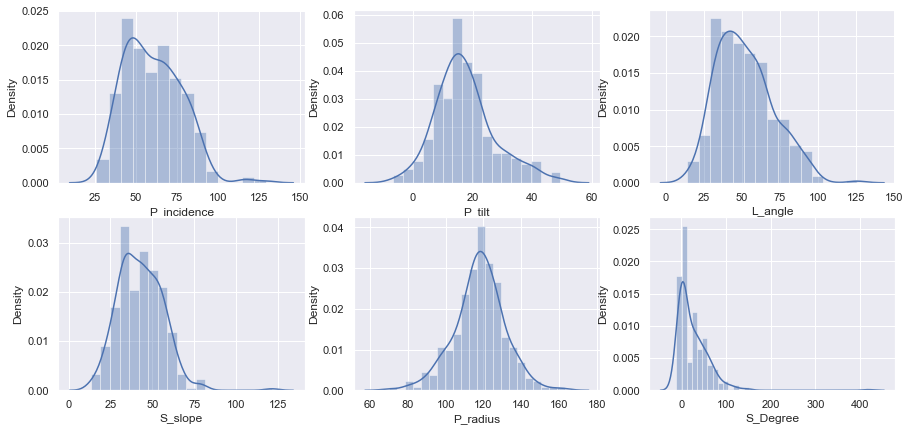

In [707]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize= (15,7)) #define the figure structure, shape & size
sns.distplot(df['P_incidence'], kde=True, ax=axs[0,0])#drawing the distribution of a particular attribute in different coloumn
sns.distplot(df['P_tilt'], kde=True, ax=axs[0,1])#drawing the distribution of a particular attribute in different coloumn
sns.distplot(df['L_angle'], kde=True, ax=axs[0,2])#drawing the distribution of a particular attribute in different coloumn
sns.distplot(df['S_slope'], kde=True, ax=axs[1,0])#drawing the distribution of a particular attribute in different coloumn
sns.distplot(df['P_radius'], kde=True, ax=axs[1,1])#drawing the distribution of a particular attribute in different coloumn
sns.distplot(df['S_Degree'], kde=True, ax=axs[1,2])#drawing the distribution of a particular attribute in different coloumn

In [708]:
print("\nskew of incidence : ",df['P_incidence'].skew()) #compute skew value for particular coloumn
print("\nskew of tilt : ",df['P_tilt'].skew()) #compute skew value for particular coloumn
print("\nskew of angle : ",df['L_angle'].skew()) #compute skew value for particular coloumn
print("\nskew of slope : ",df['S_slope'].skew()) #compute skew value for particular coloumn
print("\nskew of radius : ",df['P_radius'].skew()) #compute skew value for particular coloumn
print("\nskew of degree : ",df['S_Degree'].skew()) #compute skew value for particular coloumn


skew of incidence :  0.5204398948625641

skew of tilt :  0.6765533590425814

skew of angle :  0.599451477593938

skew of slope :  0.7925766941630666

skew of radius :  -0.17683486805356013

skew of degree :  4.317953644012237


Measure of skewness of incidence, tilt, angle, slope & degree shows +ive skewness except radius and all parameters are normally distributed. So, no need for any transformation

In [709]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='S_Degree'>

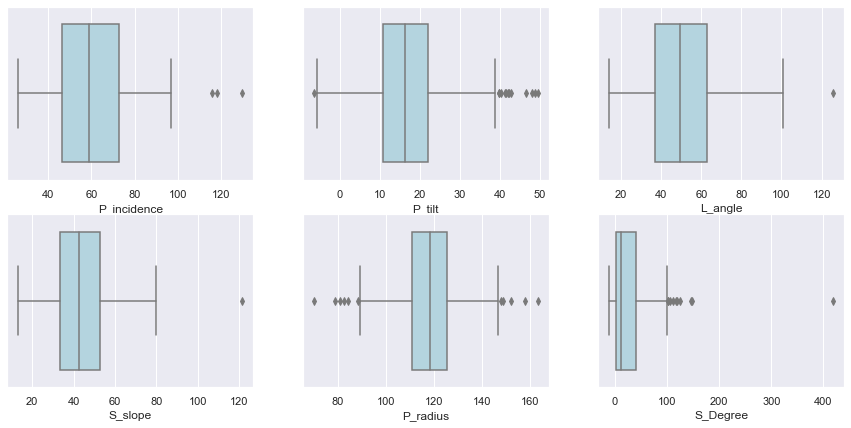

In [710]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize= (15,7)) #define the figure structure, shape & size
sns.boxplot(df['P_incidence'], color='lightblue', ax=axs[0,0])#drawing the distribution of a particular attribute in different coloumn
sns.boxplot(df['P_tilt'], color='lightblue', ax=axs[0,1])#drawing the distribution of a particular attribute in different coloumn
sns.boxplot(df['L_angle'], color='lightblue', ax=axs[0,2])#drawing the distribution of a particular attribute in different coloumn
sns.boxplot(df['S_slope'], color='lightblue', ax=axs[1,0])#drawing the distribution of a particular attribute in different coloumn
sns.boxplot(df['P_radius'], color='lightblue', ax=axs[1,1])#drawing the distribution of a particular attribute in different coloumn
sns.boxplot(df['S_Degree'], color='lightblue', ax=axs[1,2])#drawing the distribution of a particular attribute in different coloumn

In [711]:
Q1 = df.quantile(0.25) #getting 25% quantile value for each coloumn
Q3 = df.quantile(0.75) #getting 75% quantile value for each coloumn
IQR = Q3 - Q1 #Inter quantile range 

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() #compute the count of outliers in each coloumn

Class           0
L_angle         1
P_incidence     3
P_radius       11
P_tilt         13
S_Degree       10
S_slope         1
dtype: int64

From boxplot it is evident that most of parameters has very less outliers compared with total records. we may try to solve the problem eliminating outliers. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

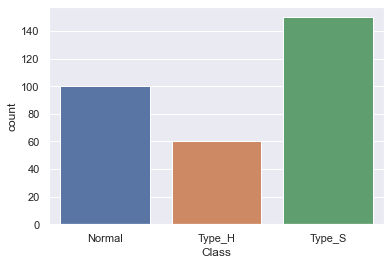

In [712]:
sns.countplot(df['Class'])#drawing the countplot to see the distribution of a particular attribute in different coloumn

From count plot we can see the distribution of of categorical 'Class' columns. Normal class count is of 100, type_h class count is of 60 & type_s class count is of 150. 
Therefore, we no need to interpolate as least count of type_h class is not very less compared with other classes. 

# 3b. Multivariate analysis

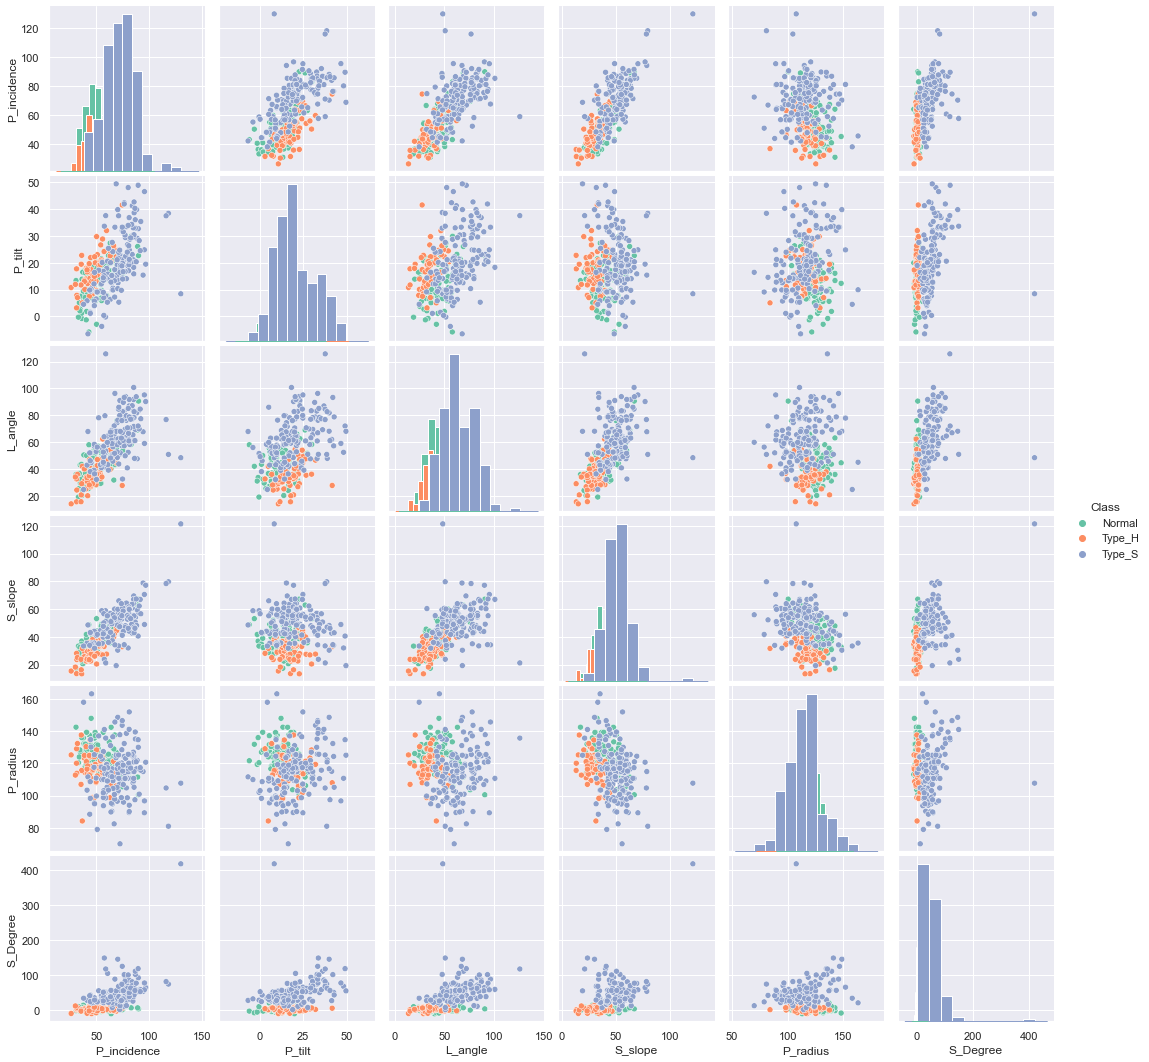

In [713]:
g=sns.pairplot(df,hue="Class", palette="Set2")  #pairplot
g=g.map_diag(plt.hist, edgecolor="w")
#sns.pairplot(df.iloc[:, 0:6],hue="Class", palette="Set2")  #pairplot
plt.show()

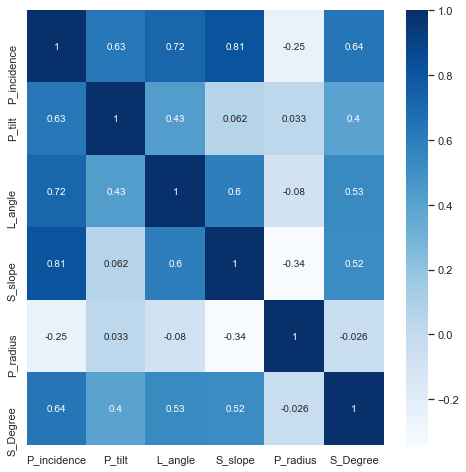

In [714]:
df_corr = df.iloc[:,0:6].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

From pair plot we can visualize how different attributes are correlated w.r.t others and itself. The attributes with +/-ive correlation with other attributes are be useful for further processing as it might contribute to predication. The correlation values between attributes can be computed through corr method.

In [814]:
df.groupby(["Class"]).count()

P_incidence  P_tilt  L_angle  S_slope  P_radius  S_Degree
Class                                                            
Normal          100     100      100      100       100       100
Type_H           60      60       60       60        60        60
Type_S          150     150      150      150       150       150

# 4 Data pre-processing:a Segregate predictors vs target attributes

In [815]:
X = df.drop(labels= "Class" , axis = 1)
X.head()
y = df["Class"]

# 4c. check for target balancing and fix it if found imbalanced.

From count plot we can see the distribution of of categorical 'Class' columns. Normal class count is of 100, type_h class count is of 60 & type_s class count is of 150. Therefore, we may need to balance the target class

Trying to scale the input attributes by Z scaler and by minmax scaler as the range are different but no significant changes between two types of scaling

# 4d. Perform train-test split.

In [816]:
# Split X and y into training and test set in 70:30 ratio
#X_train, X_test, y_train, y_test = train_test_split(X_data_minmax, y, test_size=0.30, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

# it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.

In [817]:
#scaler = preprocessing.StandardScaler()#to remove the mean and scales each feature/variable to unit varianc
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train )#scale the attributes and get the transform
X_test = scaler.transform( X_test )#apply the scaling transform obtained through training records to testing records 

# 4b. scaling the attributes 

In [819]:
counter = Counter(y_train)# to get the count of distinct targets
print(counter)

Counter({'Type_S': 89, 'Normal': 63, 'Type_H': 34})


# 4C.SMOTE balancing

In [820]:
smt = SMOTE()# though interpolation of records w.r.t to targets, we are applying oversampling to equal number of records to all targets
X_train, y_train = smt.fit_resample(X_train, y_train)# to avoid imbalanced classification

In [822]:
counter = Counter(y_train_sm)# to get the count of distinct targets after balancing 
print(counter)#

Counter({'Type_S': 89, 'Normal': 89, 'Type_H': 89})


After oversampling test inputs are balanced for classifcation

# 5a.Design and train a KNN classifier.

In [824]:
# For every test data point, predict it's label based on default parameters
NNH = KNeighborsClassifier()
#NNH_sm = KNeighborsClassifier(n_neighbors= 5 ,algorithm='auto', leaf_size=30, metric='euclidean')
#NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [831]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier()

In [838]:
# For every train data point, predict it's label based on default parameters
predicted_labels = NNH.predict(X_train)
NNH.score(X_train, y_train)

0.8951310861423221

In [839]:
# For every test data point, predict it's label based on default parameters
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7096774193548387

# 5d. Iterating NNH with different neighbor distance and get the best neighbor distance which give better accuracy

In [841]:
# creating odd list of K for KNN
myList = list(range(1,len(X_train)))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [842]:
# empty list that will hold accuracy scores
test_scores = []
train_scores = []
# perform accuracy metrics for values from 1,3,5....500
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    '''
    # predict the response
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    # evaluate accuracy
    testscores = accuracy_score(y_test, y_test_pred)
    trainscores = accuracy_score(y_train, y_train_pred)
    test_scores.append(testscores)
    train_scores.append(trainscores)
    '''
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

max_train_score = max(train_scores)*100
max_test_score = max(test_scores)*100
# determining best k
optimal_k = neighbors[test_scores.index(max(test_scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The max_train_score = ", max_train_score)
print("The max_test_score = ", max_test_score)

The optimal number of neighbors is 63
The max_train_score =  100.0
The max_test_score =  76.61290322580645


In [843]:
#np.array(train_scores).transpose()

In [844]:
#np.array(test_scores).transpose()

In [845]:
#np.array(MSEtest).transpose()

# 5b. the classification accuracies for train and test data

In [863]:
print("Optimal neighbor distance value of ", optimal_k, " gives better test accuray of ", max_test_score, "and train accuracy of ", max_train_score)


Optimal neighbor distance value of  63  gives better test accuray of  76.61290322580645 and train accuracy of  100.0


# 5c. Display and explain the classification report in detail.

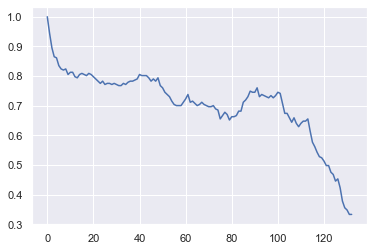

In [847]:
plt.plot(train_scores)

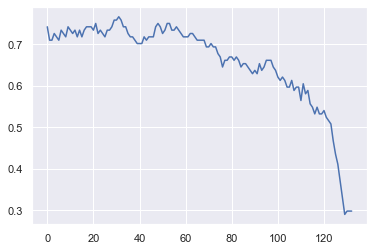

In [848]:
plt.plot(test_scores)

In [869]:
print(optimal_k)
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

63


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

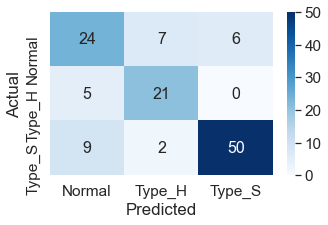

In [870]:
data = metrics.confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [871]:
df_cm

Predicted  Normal  Type_H  Type_S
Actual                           
Normal         24       7       6
Type_H          5      21       0
Type_S          9       2      50

# 5e. After apply all the possible tuning techniques to train the best model for the given data.

#  Applying GridSearchCV to find optimal parameters

In [855]:
n_neighbors = range(1, len(X_train), 2)
weight = ['uniform','distance']
metric = ['euclidean', 'manhattan', 'minkowski']
param_grid = dict(n_neighbors=n_neighbors, weights=weight, metric=metric)
print(param_grid)

{'n_neighbors': range(1, 267, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [856]:
modelknn = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=modelknn, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 197, in predict
   

Best: 0.893780 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.893780 (0.062266) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.893780 (0.062266) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.837607 (0.069165) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.865147 (0.068151) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.813723 (0.084850) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.868898 (0.074413) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.812631 (0.084806) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.871368 (0.070588) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.800237 (0.073336) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.873837 (0.070954) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.792498 (

In [857]:
'''
neigh = KNeighborsClassifier()
grid = GridSearchCV(neigh,param_grid,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)
'''
print(grid_result.best_score_)
print(grid_result.best_params_)


0.8937796771130105
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [858]:
print(grid_result.best_params_.values())
print(grid_result.best_params_.keys())
print(grid_result.best_params_["weights"])
print(grid_result.best_params_)

dict_values(['euclidean', 1, 'uniform'])
dict_keys(['metric', 'n_neighbors', 'weights'])
uniform
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [859]:
#Setup a knn classifier with k neighbors
gridsearch_knn = KNeighborsClassifier(n_neighbors=grid_result.best_params_["n_neighbors"],weights=grid_result.best_params_["weights"])

gridsearch_knn.fit(X_train,y_train)
gridsearch_knn.score(X_test,y_test)


0.7419354838709677

# 5c. classification report in detail

In [860]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=grid_result.best_params_["n_neighbors"],weights=grid_result.best_params_["weights"])

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7419354838709677

In [861]:
y_pred = knn.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

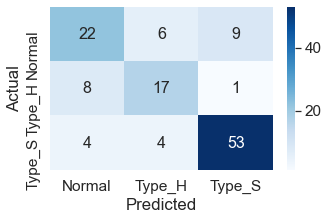

In [872]:
data = metrics.confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

From above KNN classifier, with automated process of finding optimal number of neighbors is 1, with it we were able to achieve test accuray of  75% . 

In [862]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Normal       0.65      0.59      0.62        37
      Type_H       0.63      0.65      0.64        26
      Type_S       0.84      0.87      0.85        61

    accuracy                           0.74       124
   macro avg       0.71      0.71      0.71       124
weighted avg       0.74      0.74      0.74       124



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all patients that labeled as Normal, Type_H & Types_S how many are actually Normal, Type_H & Types_S? High precision relates to the low false positive rate. We have got 0.61,0.62 & 0.88 precision respectively.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly Normal, Type_H & Types_S, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

# 6a. Conclusion on the result

We have iterated with default NNH, the test accuracy was 69%, on varying k neighbor value we found k=21 gave best accuracy for our test set of 75%. Also, classification report support the selection of particular k value.

# 6b. Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

We can use polynomial features to expand the attributes and test the accuracy

We can try removing outliers and check our results

Getting balanced data might improve the results

Also, adding more new attribtues might help in better  prediction

In order to have more accurate predictions in your test data, you will need to have optimal parameters. This is obtained by using GridSearchCV, found in Scikit-learn model_selection. It also provided 73% accuracy for test set.

# EXTRA WORK ON TRYING WITH POLYNOMIAL FEATURES

In [746]:
#X.reset_index(drop=True, inplace=True)
trans = PolynomialFeatures(degree=1)
Xpfeat = pd.DataFrame(trans.fit_transform(X))

accum = pd.DataFrame(columns=['d','k','te','tr'])

In [747]:

for i in range(4):
    print(i)
    accum = accum.append(pd.Series([i,i+1,i+2,i+3], index=['d','k','te','tr']), ignore_index=True)

0
1
2
3


In [748]:
print(accum)

   d  k te tr
0  0  1  2  3
1  1  2  3  4
2  2  3  4  5
3  3  4  5  6


In [749]:
# empty list that will hold accuracy scores
test_scores = []
train_scores = []
deg = []
# calculate change in number of features

accum = pd.DataFrame(columns=['d','k','te_acc','tr_acc','mse_te', 'mse_tr'])

degress = [i for i in range(1, 10)]

# perform accuracy metrics for values from 1,3,5....50 to find optimal k
for d in degress:
    for k in neighbors:
        trans = PolynomialFeatures(degree=d)# fit and transform
        X_train_trans = pd.DataFrame(trans.fit_transform(X_train))
        X_test_trans = pd.DataFrame(trans.fit_transform(X_test))
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn.fit(X_train_trans, y_train)
        # predict the response
        y_train_pred = knn.predict(X_train_trans)
        y_test_pred = knn.predict(X_test_trans)
        # evaluate accuracy
        testscores = accuracy_score(y_test, y_test_pred)
        trainscores = accuracy_score(y_train, y_train_pred)
        accum = accum.append(pd.Series([d,k,testscores*100,trainscores*100,100-testscores*100,100-trainscores*100], index=['d','k','te_acc','tr_acc','mse_te', 'mse_tr']), ignore_index=True)


#optimal_k = neighbors[MSEtest.index(min(MSEtest))]
#print("The optimal number of neighbors is %d" % optimal_k)

In [750]:
len(accum)

1197

In [751]:
len(neighbors)

133

In [752]:
accum["mse_te"].min()

24.19354838709677

In [753]:
accum["mse_te"].idxmin()

49

In [754]:
accum.iloc[12,:]

d          1.000000
k         25.000000
te_acc    70.967742
tr_acc    82.022472
mse_te    29.032258
mse_tr    17.977528
Name: 12, dtype: float64

In [755]:
accum

d      k     te_acc      tr_acc     mse_te     mse_tr
0     1.0    1.0  73.387097  100.000000  26.612903   0.000000
1     1.0    3.0  68.548387   93.632959  31.451613   6.367041
2     1.0    5.0  69.354839   88.764045  30.645161  11.235955
3     1.0    7.0  70.967742   86.142322  29.032258  13.857678
4     1.0    9.0  72.580645   85.393258  27.419355  14.606742
...   ...    ...        ...         ...        ...        ...
1192  9.0  257.0  29.838710   33.333333  70.161290  66.666667
1193  9.0  259.0  29.838710   33.333333  70.161290  66.666667
1194  9.0  261.0  29.838710   33.333333  70.161290  66.666667
1195  9.0  263.0  29.838710   33.333333  70.161290  66.666667
1196  9.0  265.0  29.838710   33.333333  70.161290  66.666667

[1197 rows x 6 columns]

In [756]:
accum["te_acc"].max()

75.80645161290323

Conclusion: polynomial features also providing same accuracy